In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
# Set the style of the visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer

In [59]:
# Load the dataset
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Display the first few rows of the dataset
data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Pre-processing

Merge column "Unnamed: 2",	"Unnamed: 3",	Unnamed: 4".
it look like while collecting dataset some text get fragmented.

In [60]:
# Merge 'v2' with the 'Unnamed' columns to recover the complete text messages
data['message'] = data['v2'].str.cat(data[['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']], sep=' ', na_rep='').str.strip()

# Drop the original 'v2' and 'Unnamed' columns
data_cleaned = data.drop(columns=['v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Display the first few rows of the cleaned dataset
data_cleaned.head()


,v1,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Check duplicate value
if (yes)
  delete

In [61]:
# Check for duplicate rows in the upsampled dataset
duplicate_rows = data_cleaned[data_cleaned.duplicated()]

# Display the number of duplicate rows
num_duplicates = len(duplicate_rows)
num_duplicates


414

In [62]:
# Remove duplicate rows from the upsampled dataset
df_deduplicated = data_cleaned.drop_duplicates()

# Check the shape of the deduplicated dataset
deduplicated_shape = df_deduplicated.shape
deduplicated_shape


(5158, 2)

In [63]:
# Calculate the length of each message
data_cleaned['text_length'] = data_cleaned['message'].apply(len)

# Calculate basic statistics for the lengths of messages in both "ham" and "spam" categories
stats = data_cleaned.groupby('v1')['text_length'].describe()

stats


,count,mean,std,min,25%,50%,75%,max
v1,,,,,,,,
ham,4825.0,71.606839,58.45329,2.0,33.0,52.0,93.0,910.0
spam,747.0,139.116466,28.96399,13.0,133.0,149.0,157.0,224.0


In [64]:


# Apply label encoding on the 'v1' column
encoder = LabelEncoder()
data_cleaned['Target'] = encoder.fit_transform(data_cleaned['v1'])

# Display the first few rows with the encoded labels
data_cleaned[['v1', 'Target']].head()


,v1,Target
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


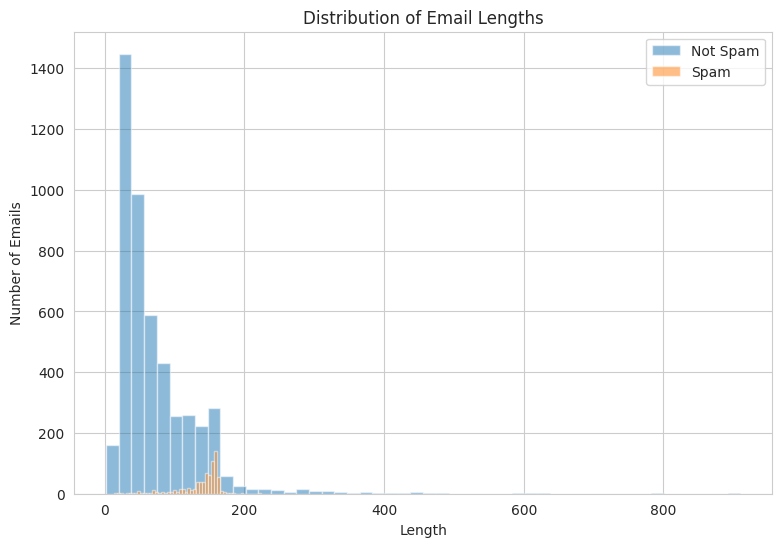

In [65]:
# Visualize the distribution of email lengths for both spam and non-spam categories
plt.figure(figsize=(9, 6))
plt.hist(data_cleaned[data_cleaned['Target'] == 0]['text_length'], bins=50, alpha=0.5, label='Not Spam')
plt.hist(data_cleaned[data_cleaned['Target'] == 1]['text_length'], bins=50, alpha=0.5, label='Spam')
plt.title('Distribution of Email Lengths')
plt.xlabel('Length')
plt.ylabel('Number of Emails')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [66]:
# Drop the 'v1' column
data_cleaned = data_cleaned.drop(columns=['v1','text_length'])

# Display the first few rows of the updated dataset
data_cleaned.head()

,message,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


Distribution of classes

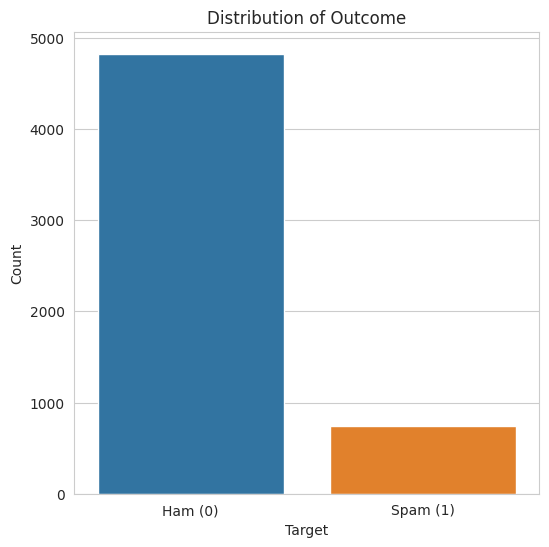

In [67]:
sns.set_style("whitegrid")

# Draw a bar plot of 'Outcome' value counts
plt.figure(figsize=(6, 6))
sns.countplot(x='Target', data=data_cleaned)
plt.title('Distribution of Outcome')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham (0)', 'Spam (1)'])
plt.show()

Solve class imbalance issue using oversampling

In [68]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = data_cleaned[data_cleaned['Target'] == 0]
df_minority = data_cleaned[data_cleaned['Target'] == 1]

# Oversample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine the majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check the distribution of the labels in the upsampled dataset
upsampled_label_distribution = df_upsampled['Target'].value_counts(normalize=True)

upsampled_label_distribution

0    0.5
1    0.5
Name: Target, dtype: float64

# Text Preprocessing

In [69]:
df_upsampled

,message,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
6,Even my brother is not like to speak with me. ...,0
...,...,...
4246,Text PASS to 69669 to collect your polyphonic ...,1
3673,You have won a Nokia 7250i. This is what you g...,1
3618,8007 25p 4 Alfie Moon's Children in Need song ...,1
3499,Dorothy@kiefer.com (Bank of Granite issues Str...,1


Download the stopwords and punkt (used for tokenization) from nltk

In [38]:
# Download the stopwords and punkt (used for tokenization) from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
# Load the list of stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

df_upsampled['preprocessed_msg'] = df_upsampled['message'].apply(clean_text)

# Display the first few rows after cleaning
df_upsampled.head()


,message,Target,preprocessed_msg
0,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazy, available, bugis, n..."
1,Ok lar... Joking wif u oni...,0,"[ok, lar, joking, wif, u, oni]"
3,U dun say so early hor... U c already then say...,0,"[u, dun, say, early, hor, u, c, already, say]"
4,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goes, usf, lives, around, t..."
6,Even my brother is not like to speak with me. ...,0,"[even, brother, like, speak, treat, like, aids..."


In [40]:


# Initialize the stemmer
stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the tokens
df_upsampled['stemmed_tokens'] = df_upsampled['preprocessed_msg'].apply(stem_tokens)

# Display the first few rows of the dataset after stemming
df_upsampled.head()

,message,Target,preprocessed_msg,stemmed_tokens
0,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,Ok lar... Joking wif u oni...,0,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
3,U dun say so early hor... U c already then say...,0,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
6,Even my brother is not like to speak with me. ...,0,"[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."


In [41]:
from gensim.models import Word2Vec

# Tokenize the cleaned text
sentences = df_upsampled['stemmed_tokens'].tolist()

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.train(sentences, total_examples=len(sentences), epochs=100)

# Function to convert an SMS message into a vector (by averaging the vectors of its words)
def message_to_vector(message):
    words = [word for word in message if word in word2vec_model.wv.index_to_key]
    if len(words) == 0:
        return [0] * 100
    return sum(word2vec_model.wv[word] for word in words) / len(words)

# Transform the cleaned text data into vectors
df_upsampled['vectorized_df']  = df_upsampled['stemmed_tokens'].apply(message_to_vector).tolist()

# Convert to a format suitable for modeling (e.g., DataFrame)
#df_upsampled['vectorized_df'] =

df_upsampled.head()



,message,Target,preprocessed_msg,stemmed_tokens,vectorized_df
0,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...","[-0.15542233, 1.0565736, 0.16463017, -1.186203..."
1,Ok lar... Joking wif u oni...,0,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[-0.3803909, 0.8009469, -0.06931781, -0.702195..."
3,U dun say so early hor... U c already then say...,0,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[-0.8113044, 2.6429846, -0.6941866, -0.5386454..."
4,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[0.24258274, -0.22851813, 0.396628, 0.12315598..."
6,Even my brother is not like to speak with me. ...,0,"[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[0.57697725, 0.28768817, -0.019863665, -1.1087..."


# Machine LEarning Classifier

*   KNN (n=5)
*   Logistic Regression
*   Random Forest
*   SVM



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,roc_curve, auc, confusion_matrix

only need vector data for training so use


*   list(df_upsampled['vectorized_df'])




In [43]:
# Splitting the dataset into training and testing sets
X = list(df_upsampled['vectorized_df'])
y = df_upsampled['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9813471502590674

Confusion matrix and Classification report

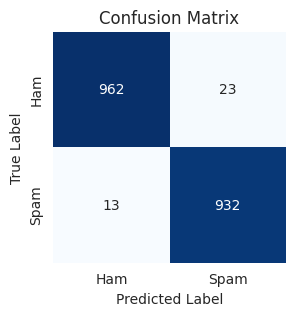

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.98       985
        Spam       0.98      0.99      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



In [45]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate and display the classification report
class_report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])

print(class_report)

Roc curve

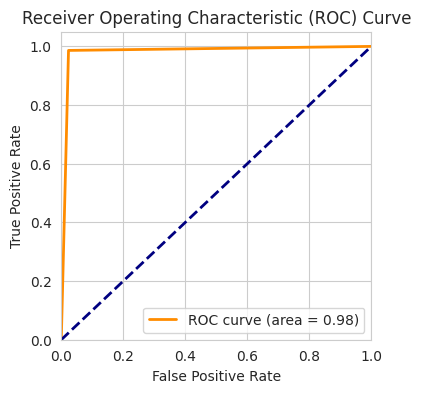

In [46]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9984455958549223


Confusion matrix and CLassification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



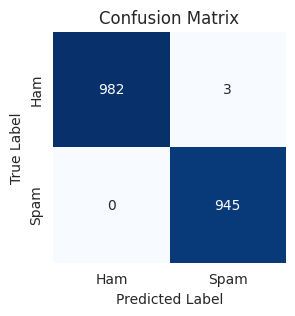

In [48]:

print(classification_report(y_test, y_pred))
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

ROC curve

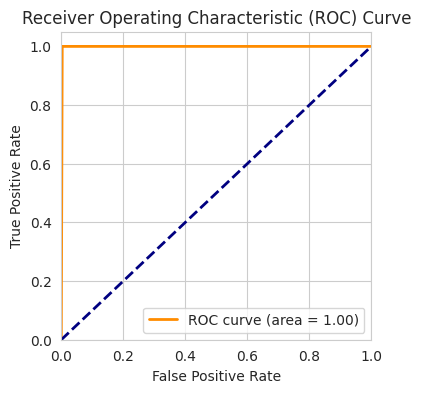

In [49]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Support Vector Classifier

In [51]:
from sklearn.svm import SVC

# Initialize and train the Naive Bayes classifier
# Initialize and train the SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       985
           1       0.98      0.99      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



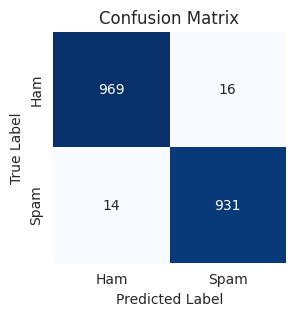

In [52]:
print(classification_report(y_test, y_pred))
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

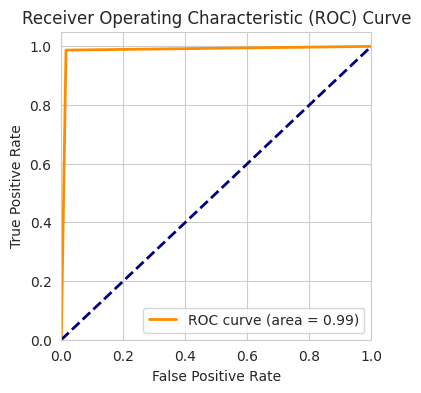

In [56]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter for convergence
lr_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       985
           1       0.98      0.99      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



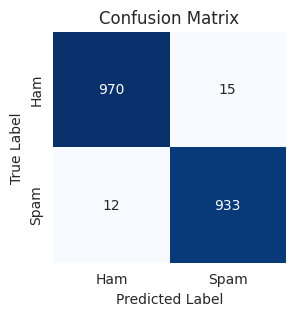

In [55]:
print(classification_report(y_test, y_pred))
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

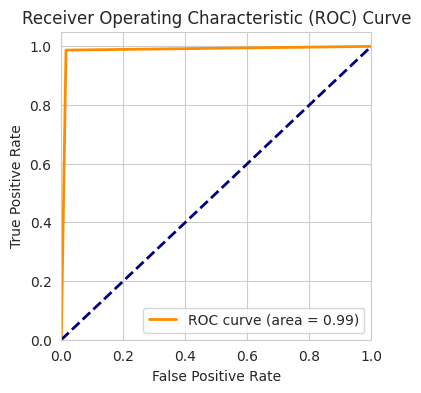

In [57]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()